In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.rename(columns={'Genre':'Genders'},inplace=True)

In [5]:
df

,CustomerID,Genders,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
df.shape

(200, 5)

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df.dtypes

CustomerID                 int64
Genders                   object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [9]:
df.isnull().sum()

CustomerID                0
Genders                   0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
df.drop(["CustomerID"],axis=1,inplace=True)

In [11]:
df.head()

,Genders,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


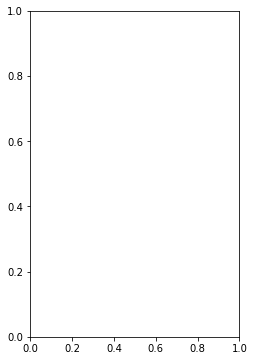

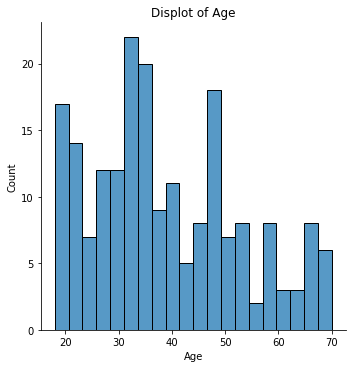

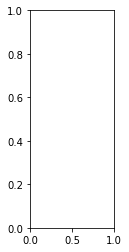

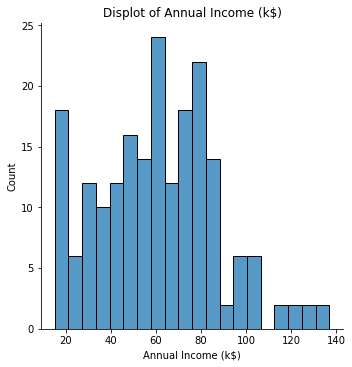

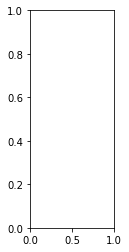

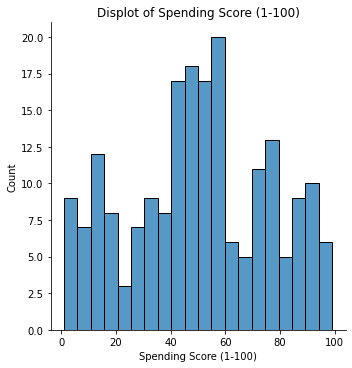

In [12]:
plt.figure(1, figsize=(15,6))
n=0
for x in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.displot(df[x],bins=20)
    plt.title('Displot of {}'.format(x))
    plt.show()

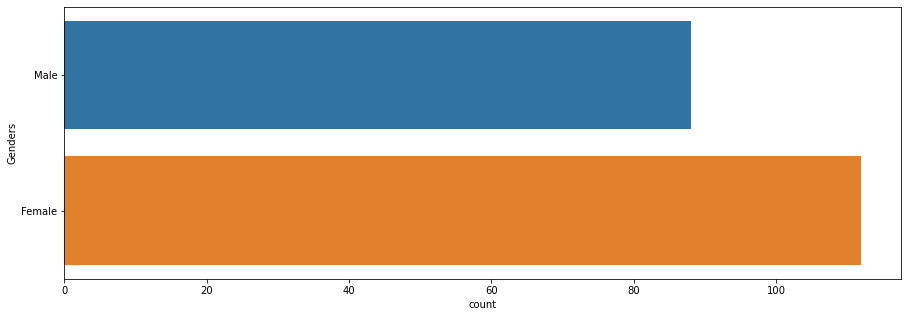

In [13]:
plt.figure(figsize=(15,5))
sns.countplot(y='Genders',data=df)
plt.show()

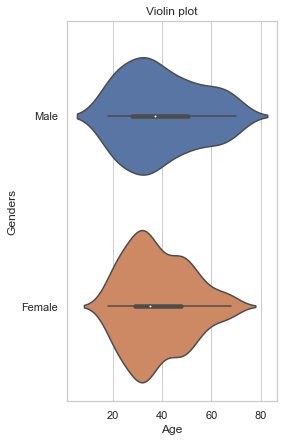

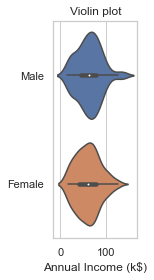

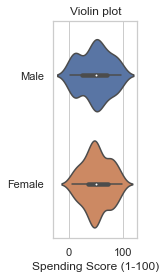

In [15]:
plt.figure(1,figsize=(15,7))
n=0
for cols in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.violinplot(x = cols, y= 'Genders', data = df)
    plt.ylabel('Genders' if n == 1 else '')
    plt.title('Violin plot')
    plt.show()

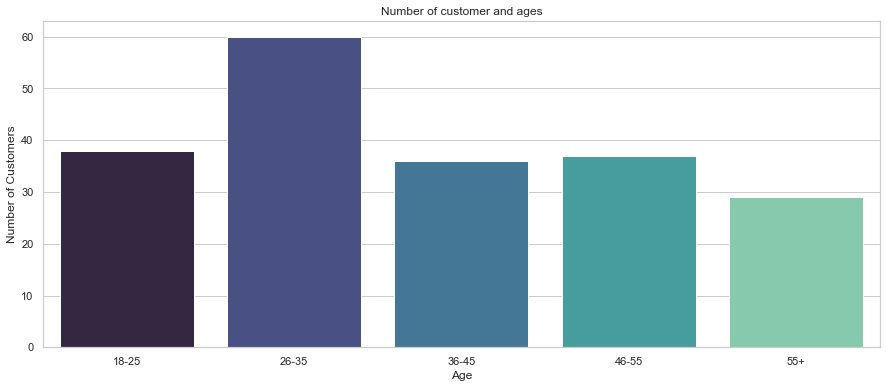

In [19]:
age_18_25 = df.Age[(df.Age >= 18) & (df.Age<=25)]
age_26_35 = df.Age[(df.Age >= 26) & (df.Age<=35)]
age_36_45 = df.Age[(df.Age >= 36) & (df.Age<=45)]
age_46_55 = df.Age[(df.Age >= 46) & (df.Age<=55)]
age_above_55= df.Age[(df.Age >= 56)]

agex=["18-25","26-35","36-45","46-55","55+"]
agey=[len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_above_55.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=agex , y=agey , palette="mako")
plt.title("Number of customer and ages")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()

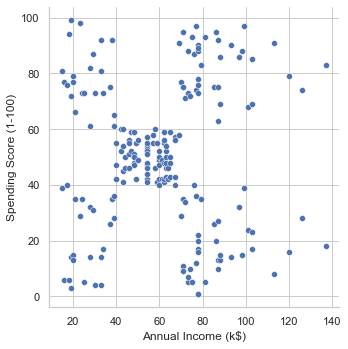

In [20]:
sns.relplot(x="Annual Income (k$)",y="Spending Score (1-100)", data=df)

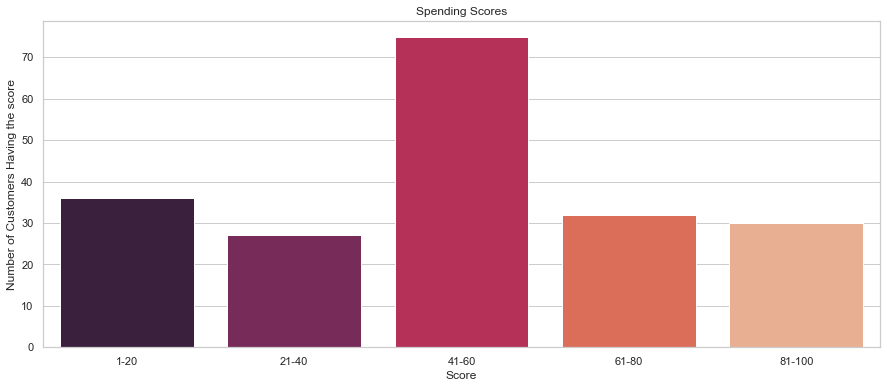

In [24]:
ss_1_20=df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=1) & (df["Spending Score (1-100)"]<=20)]
ss_21_40=df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=21) & (df["Spending Score (1-100)"]<=40)]
ss_41_60=df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=41) & (df["Spending Score (1-100)"]<=60)]
ss_61_80=df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=61) & (df["Spending Score (1-100)"]<=80)]
ss_81_100=df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=81) & (df["Spending Score (1-100)"]<=100)]

ssx = ["1-20","21-40","41-60","61-80","81-100"]
ssy=[len(ss_1_20.values),len(ss_21_40.values),len(ss_41_60.values),len(ss_61_80.values),len(ss_81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx , y=ssy , palette="rocket")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customers Having the score")
plt.show()

C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


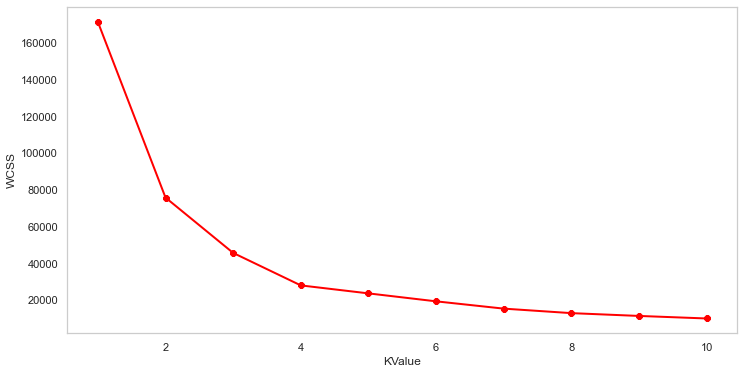

In [30]:
x1=df.loc[:, ["Age","Spending Score (1-100)"]].values
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans=KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red" , marker = "8")
plt.xlabel("KValue")
plt.ylabel("WCSS")
plt.show()

In [32]:
kmeans = KMeans(n_clusters=4)
label = kmeans.fit_predict(x1)
print(label)

[0 3 2 3 0 3 2 3 2 3 2 3 2 3 2 3 0 0 2 3 0 3 2 3 2 3 2 0 2 3 2 3 2 3 2 3 2
 3 2 3 1 3 1 0 2 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1
 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1
 0 0 0 0 0 1 1 1 1 0 0 0 3 0 3 1 3 2 3 2 3 0 3 2 3 2 3 2 3 2 3 0 3 2 3 1 3
 2 3 2 3 2 3 2 3 2 3 2 3 1 3 2 3 2 3 2 3 2 0 2 3 2 3 2 3 2 3 2 3 2 3 2 3 0
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3]


In [33]:
print(kmeans.cluster_centers_)

[[27.61702128 49.14893617]
 [55.70833333 48.22916667]
 [43.29166667 15.02083333]
 [30.1754386  82.35087719]]


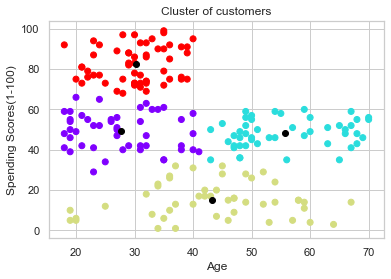

In [37]:
plt.scatter(x1[:,0],x1[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color='black')
plt.title('Cluster of customers')
plt.xlabel('Age')
plt.ylabel('Spending Scores(1-100)')
plt.show()

C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


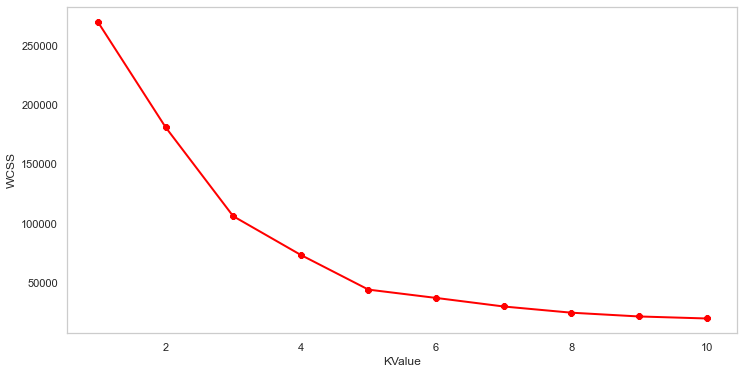

In [38]:
x2=df.loc[:, ["Annual Income (k$)","Spending Score (1-100)"]].values
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans=KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(x2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red" , marker = "8")
plt.xlabel("KValue")
plt.ylabel("WCSS")
plt.show()

In [39]:
kmeans = KMeans(n_clusters=5)
label = kmeans.fit_predict(x2)
print(label)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


In [40]:
print(kmeans.cluster_centers_)

[[55.2962963  49.51851852]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]
 [86.53846154 82.12820513]]


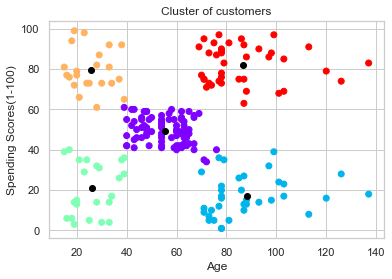

In [41]:
plt.scatter(x2[:,0],x2[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color='black')
plt.title('Cluster of customers')
plt.xlabel('Age')
plt.ylabel('Spending Scores(1-100)')
plt.show()

C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


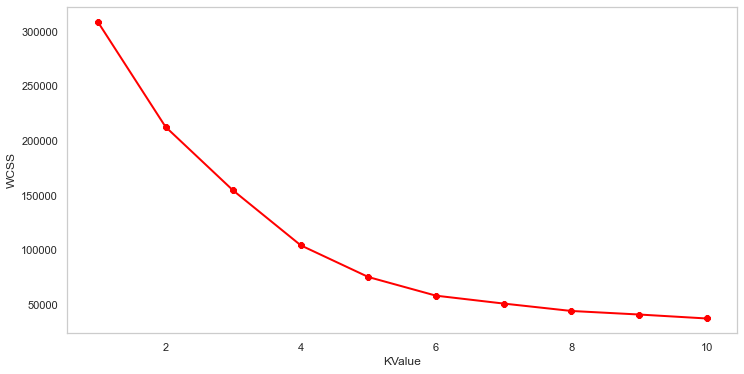

In [42]:
x3=df.iloc[:,1:]
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(x3)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red" , marker = "8")
plt.xlabel("KValue")
plt.ylabel("WCSS")
plt.show()

In [43]:
kmeans = KMeans(n_clusters=5)
label = kmeans.fit_predict(x3)
print(label)

[3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 4 0 1 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 1 0 4 0 4 0
 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0]


In [44]:
print(kmeans.cluster_centers_)

[[32.69230769 86.53846154 82.12820513]
 [43.72727273 55.48051948 49.32467532]
 [24.96       28.04       77.        ]
 [45.2173913  26.30434783 20.91304348]
 [40.66666667 87.75       17.58333333]]


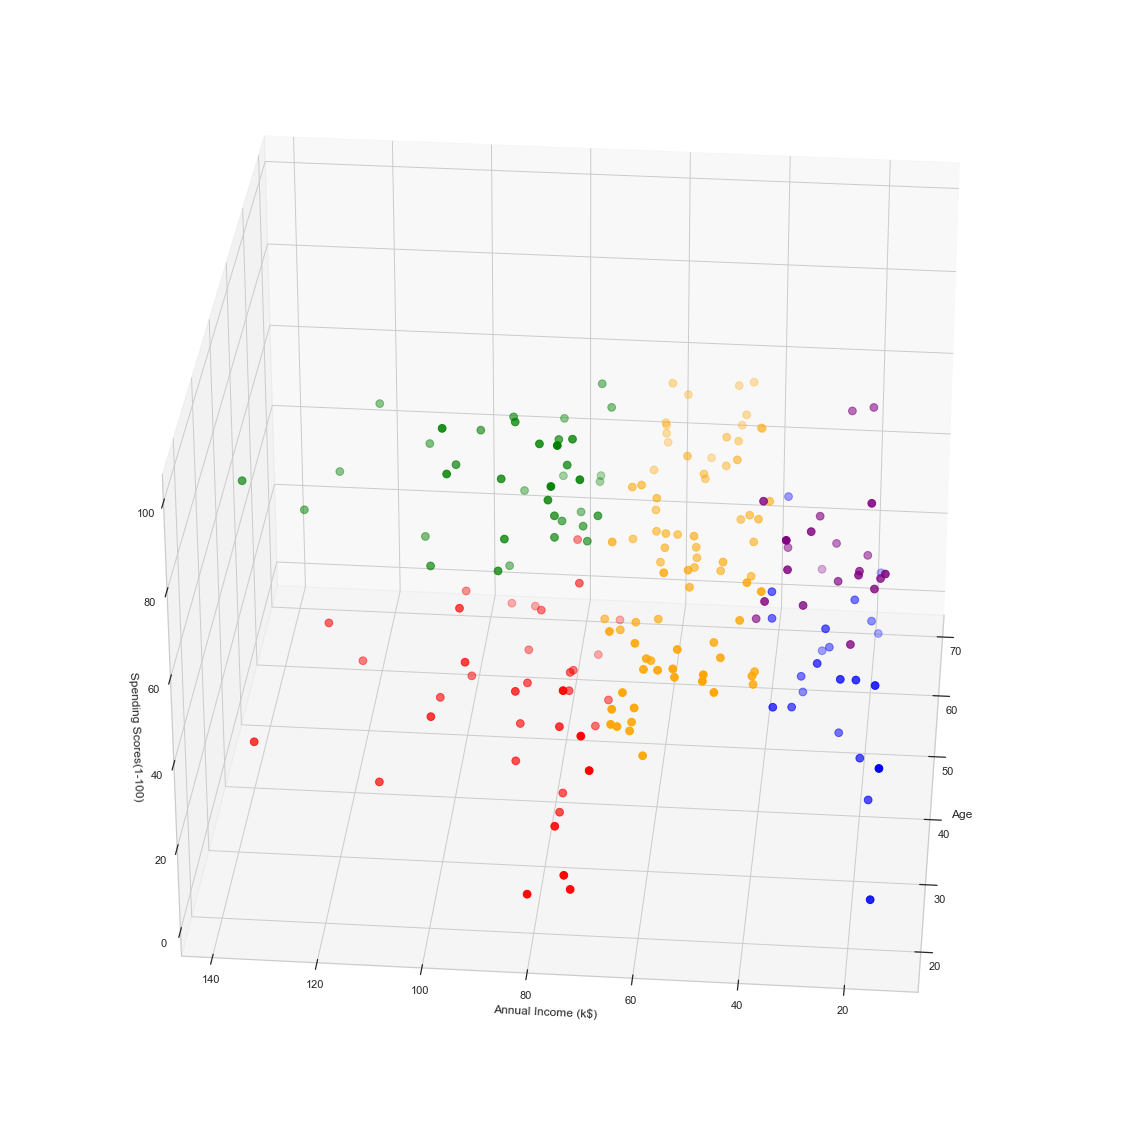

In [50]:
clusters = kmeans.fit_predict(x3)
df["label"] = clusters
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(20,30))
ax=fig.add_subplot(111, projection ='3d')
ax.scatter(df.Age[df.label == 0],df["Annual Income (k$)"][df.label == 0],df["Spending Score (1-100)"][df.label == 0],c='blue',s=60)
ax.scatter(df.Age[df.label == 1],df["Annual Income (k$)"][df.label == 1],df["Spending Score (1-100)"][df.label == 1],c='red',s=60)
ax.scatter(df.Age[df.label == 2],df["Annual Income (k$)"][df.label == 2],df["Spending Score (1-100)"][df.label == 2],c='green',s=60)
ax.scatter(df.Age[df.label == 3],df["Annual Income (k$)"][df.label == 3],df["Spending Score (1-100)"][df.label == 3],c='orange',s=60)
ax.scatter(df.Age[df.label == 4],df["Annual Income (k$)"][df.label == 4],df["Spending Score (1-100)"][df.label == 4],c='purple',s=60)
ax.view_init(30,185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Scores(1-100)")
plt.show()